# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import scipy.stats as st

In [2]:
data_0 = pd.read_csv('/geo_data_0.csv')
data_1 = pd.read_csv('/geo_data_1.csv')
data_2 = pd.read_csv('/geo_data_2.csv')

**Изучим данные 1-го региона**

In [3]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [6]:
data_0.duplicated().sum()

0

In [7]:
data_0['product'].describe()

count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64

**Изучим данные 2-го региона**

In [8]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [9]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [11]:
data_1.duplicated().sum()

0

In [12]:
data_1['product'].describe()

count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64

**Изучим данные 3-го региона**

In [13]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [14]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [16]:
data_2.duplicated().sum()

0

In [17]:
data_2['product'].describe()

count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64

**Построим ящик с усами для трёх регионов для визуального ознакомления**

Выделим из трёх регионов объём запаса нефти и объединим в один датасет 

In [18]:
df0 = data_0['product']
df1 = data_1['product']
df2 = data_2['product']
df012 = pd.DataFrame({
    '1 регион': df0,
    '2 регион': df1,
    '3 регион': df2
})
df012.head()

,1 регион,2 регион,3 регион
0,105.280062,3.179103,27.758673
1,73.037750,26.953261,56.069697
2,85.265647,134.766305,62.871910
3,168.620776,137.945408,114.572842
4,154.036647,134.766305,149.600746


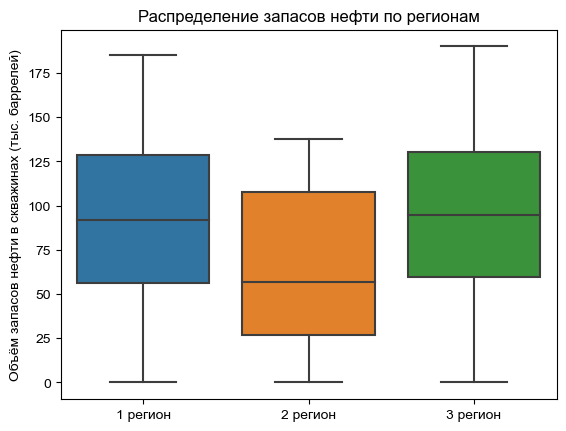

In [19]:
ax = sns.boxplot(data=df012)
sns.set(rc={'figure.figsize':(15,10)})
plt.title('Распределение запасов нефти по регионам')
plt.ylabel('Объём запасов нефти в скважинах (тыс. баррелей)')
plt.show()

**Вывод:**

1. Данные чистые, пропусков и дубликатов нет.
2. Колонки id имеют типы данных object. В дальнейшем необходимо изменить их на числовой тип.
3. После построения ящика с усами по 3-ём регионам видно, что разброс значений во втором регионе меньше чем у остальных. В то же время наибольшее медианное значение в 3 регионе и данные 1-го с 3-им регионами распределены примерно одинаково. Медианное значение 2-го региона примерно одинаково с 0.25 квантилем 1-го и 3-го регионов.

**Дубликаты в 1-ом сете**

In [20]:
data_0[data_0['id'].duplicated()]

,id,f0,f1,f2,product
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
66136,74z30,1.084962,-0.312358,6.990771,127.643327
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
75715,Tdehs,0.112079,0.430296,3.218993,60.964018
90815,fiKDv,0.049883,0.841313,6.394613,137.346586
92341,TtcGQ,0.110711,1.022689,0.911381,101.318008
97785,bsk9y,0.378429,0.005837,0.160827,160.637302


In [21]:
data_0 = data_0.drop_duplicates(subset='id')
data_0.shape

(99990, 5)

**Дубликаты во 2-ом сете**

In [22]:
data_1[data_1['id'].duplicated()]

,id,f0,f1,f2,product
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


In [23]:
data_1 = data_1.drop_duplicates(subset='id')
data_1.shape

(99996, 5)

**Дубликаты в 3-ем сете**

In [24]:
data_2[data_2['id'].duplicated()]

,id,f0,f1,f2,product
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


In [25]:
data_2 = data_2.drop_duplicates(subset='id')
data_2.shape

(99996, 5)

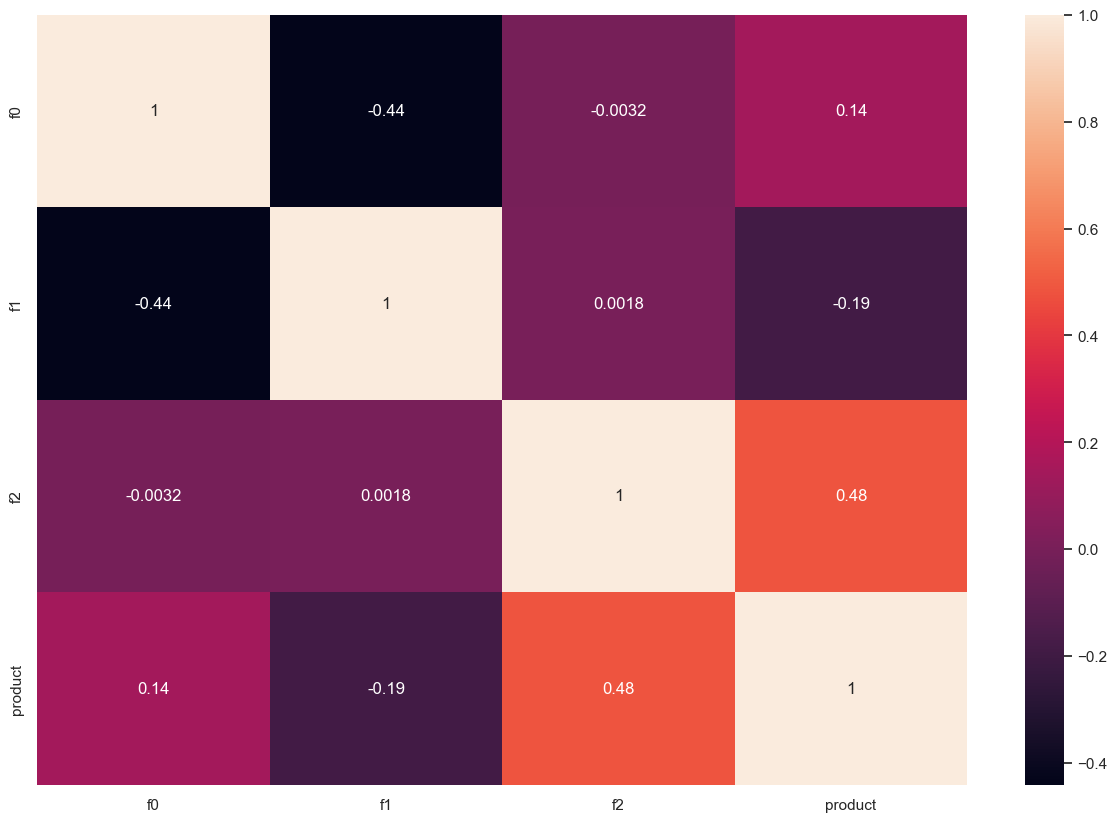

In [26]:
sns.heatmap(data_0.corr(), annot=True)
plt.show()

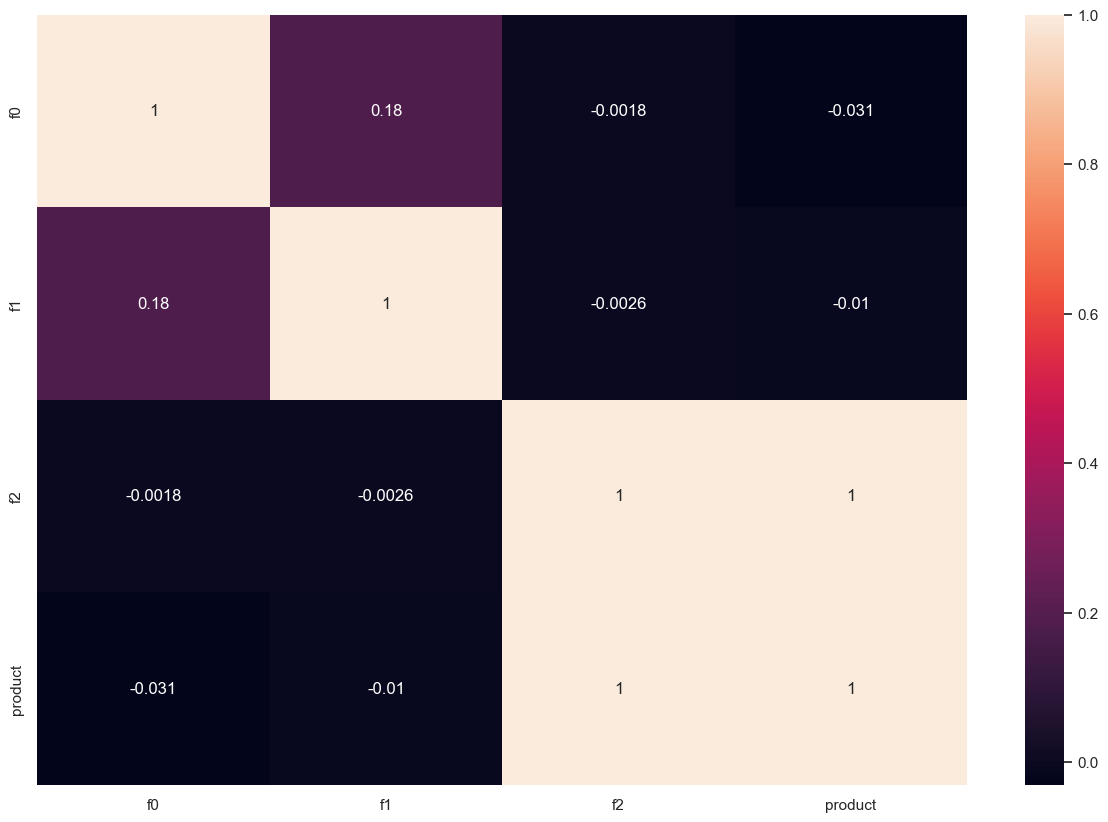

In [27]:
sns.heatmap(data_1.corr(), annot=True)
plt.show()

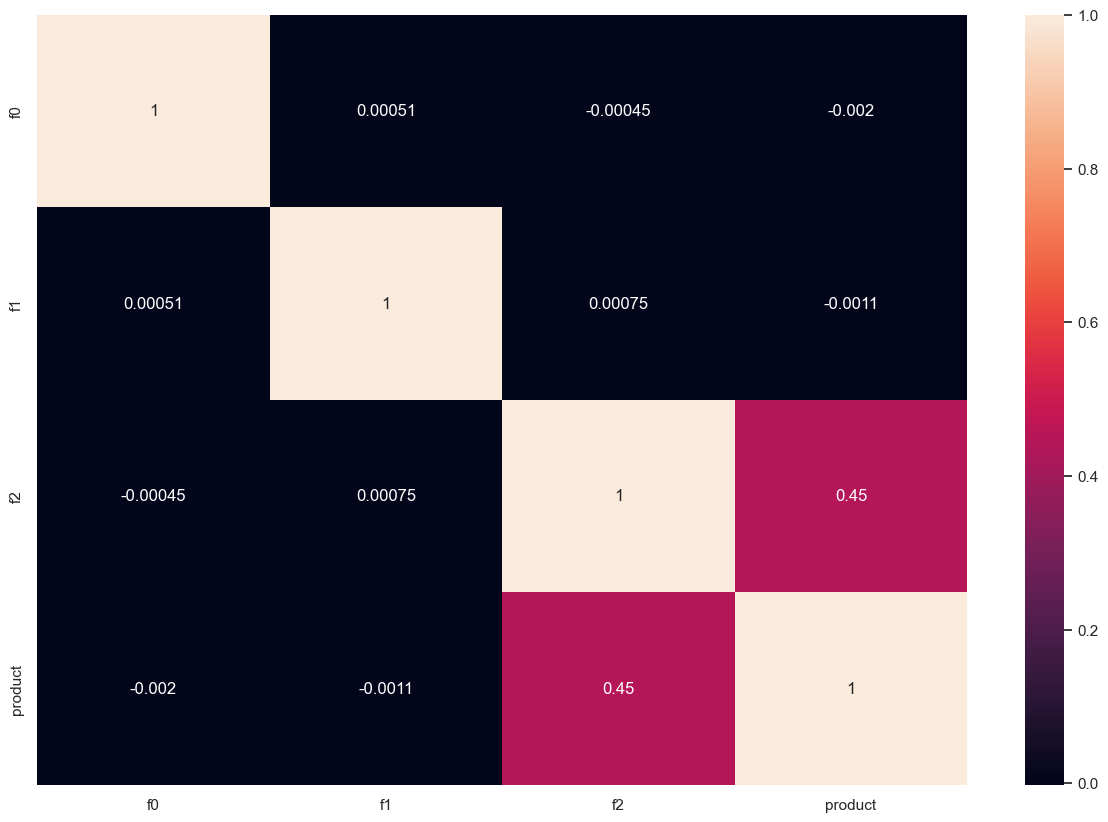

In [28]:
sns.heatmap(data_2.corr(), annot=True)
plt.show()

## Обучение и проверка модели

**Избавимся от колонки id во всех датасетах, нас этот параметр не интересует. В дальнейшем будем работать с индексами**

In [29]:
data_0 = data_0.drop(['id'], axis=1)
data_1 = data_1.drop(['id'], axis=1)
data_2 = data_2.drop(['id'], axis=1)

### Разбивка данных на обучающую и валидационную

**1-ый регион**

In [30]:
target_0 = data_0['product']
features_0 = data_0.drop(['product'], axis=1)

In [31]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=123)

**2-ой регион**

In [32]:
target_1 = data_1['product']
features_1 = data_1.drop(['product'], axis=1)

In [33]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=123)

**3-ий регион**

In [34]:
target_2 = data_2['product']
features_2 = data_2.drop(['product'], axis=1)

In [35]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=123)


In [36]:
len(features_train_0)/len(data_0)

0.74999499949995

In [37]:
len(target_valid_0)/len(data_0)

0.25000500050005

### Обучение моделей

**1-ый регион**

In [38]:
model_0 = LinearRegression()
model_0.fit(features_train_0,target_train_0)
predict_0 = model_0.predict(features_valid_0)
predict_0

array([111.11102972, 107.11699095, 120.4530202 , ...,  49.62160423,
        84.20631555,  95.18890119])

**2-ой регион**

In [39]:
model_1 = LinearRegression()
model_1.fit(features_train_1,target_train_1)
predict_1 = model_1.predict(features_valid_1)

**3-ий регион**

In [40]:
model_2 = LinearRegression()
model_2.fit(features_train_2,target_train_2)
predict_2 = model_2.predict(features_valid_2)

### Вывод среднего запаса предсказанного сырья и RMSE моделей

**1-ый регион**

In [41]:
rmse_0 = mean_squared_error(target_valid_0, predict_0)**0.5

In [42]:
print('Средний запас предсказанного сырья:',predict_0.mean())
print('RMSE модели 1-го региона:', rmse_0)

Средний запас предсказанного сырья: 92.68062036375521
RMSE модели 1-го региона: 37.59580657262362


**2-ой регион**

In [43]:
rmse_1 = mean_squared_error(target_valid_1, predict_1)**0.5

In [44]:
print('Средний запас предсказанного сырья:',predict_1.mean())
print('RMSE модели 2-го региона:', rmse_1)

Средний запас предсказанного сырья: 69.31422919477677
RMSE модели 2-го региона: 0.8944711936820187


**3-ий регион**

In [45]:
rmse_2 = mean_squared_error(target_valid_2, predict_2)**0.5

In [46]:
print('Средний запас предсказанного сырья:',predict_2.mean())
print('RMSE модели 3-го региона:', rmse_2)

Средний запас предсказанного сырья: 94.93789877099006
RMSE модели 3-го региона: 40.04908749269797


**Вывод:** лучший показатель RMSE у 2-го региона, среднее квадратичное отклонение всех значений расположены достаточно плотно, чего нельзя скащать о 1-ом и 3-ем регионах.

## Подготовка к расчёту прибыли

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

Бюджет на разработку скважин в регионе — 10 млрд рублей.

При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

### Отдельные переменные для ключевых значений

In [47]:
points_research = 500 # исследуемые точки
best_points = 200 # количество лучших точек
budget = 10000000 # общий бюджет в тыс.руб
one_barrel_cost = 450 # стоимость барреля в тыс.руб
prob_losses = 2.5/100
borehole_cost = budget/200 # стоимость разработки одной скважины в тыс.руб

In [48]:
print('Стоимость разработки одной скважины:',borehole_cost, 'тыс. руб')

Стоимость разработки одной скважины: 50000.0 тыс. руб


### Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.

In [49]:
valume = borehole_cost/one_barrel_cost

In [50]:
print('Необходимый объем сырья в одной скважине:',valume, 'тыс. баррелей')

Необходимый объем сырья в одной скважине: 111.11111111111111 тыс. баррелей


**Средний запас сырья в 1-ом регионе (тыс.баррелей)**

In [51]:
data_0['product'].mean()

92.49968421774328

**Средний запас сырья во 2-ом регионе (тыс.баррелей)**

In [52]:
data_1['product'].mean()

68.82391591806625

**Средний запас сырья в 3-ем регионе (тыс.баррелей)**

In [53]:
data_2['product'].mean()

94.99834211933415

**Вывод:** Опираясь на среднее значение объема сырья в кажном регионе можно сделать вывод, что все они не подходят. Стоит учесть следующий факт: среднее число считалось по всей выборке из 100 тыс. значений. Нам необходимо выделить из всех именно 200 скважин с наибольшим объёмом нефти, в это случае среднее число может увеличиться. 

## Расчёт прибыли и рисков 

### Выбераем скважины с максимальными значениями предсказаний. 

**200-и лучших скважин в 1-ом регионе**

In [54]:
max_value_0 = pd.Series(predict_0).sort_values(ascending=False)
max_value_0 = max_value_0[:200]
max_value_0

24676    180.578526
4937     176.376012
11187    175.766108
12612    172.841694
21197    170.456788
            ...    
21728    147.776884
23769    147.761719
15120    147.753369
17327    147.747818
18166    147.747337
Length: 200, dtype: float64

**200-и лучших скважин во 2-ом регионе**

In [55]:
max_value_1 = pd.Series(predict_1).sort_values(ascending=False)
max_value_1 = max_value_1[:200]
max_value_1

23985    139.913902
4452     139.862310
9161     139.732907
14876    139.713300
12731    139.709811
            ...    
22953    138.422586
21039    138.420172
10029    138.419731
21183    138.417832
1730     138.417745
Length: 200, dtype: float64

**200-и лучших скважин в 3-ем регионе**

In [56]:
max_value_2 = pd.Series(predict_2).sort_values(ascending=False)
max_value_2 = max_value_2[:200]
max_value_2

13966    174.310490
1334     174.190917
2975     166.493041
23187    165.671702
1790     164.307927
            ...    
3373     142.875834
14729    142.820631
21039    142.813427
647      142.783591
10113    142.726973
Length: 200, dtype: float64

### Просуммируем целевые значение объёма сырья, соответствующих этим предсказаниям.

**Общий объем сырья 200-а скважин в 1-ом регионе (тыс.баррелей)**

In [57]:
max_value_0.sum()

30899.236226178466

**Общий объем сырья 200-а скважин во 2-ом регионе (тыс.баррелей)**

In [58]:
max_value_1.sum()

27754.952187533985

**Общий объем сырья 200-а скважин в 3-ем регионе (тыс.баррелей)**

In [59]:
max_value_2.sum()

29832.290197039518

### Рассчитаем прибыль для полученного объёма сырья.

**Прибыль в 1-ом регионе (тыс.руб)**

In [60]:
((max_value_0.sum())*one_barrel_cost-budget).round(5)

3904656.30178

**Прибыль во 2-ом регионе (тыс.руб)**

In [61]:
((max_value_1.sum())*one_barrel_cost-budget).round(5)

2489728.48439

**Прибыль в 3-ем регионе (тыс.руб)**

In [62]:
((max_value_2.sum())*one_barrel_cost-budget).round(5)

3424530.58867

### Посчитаем риски и прибыль для каждого региона:

**Для 1-го региона**

In [63]:
def revenue(predict, target,count):
    predict_sorted = pd.Series(predict, index=target.index).sort_values(ascending=False)
    selected = target[predict_sorted.index][:count]
    return selected.sum()*one_barrel_cost-budget

In [64]:
state = np.random.RandomState(12345)
values_0 =[]
for i in range(1000):
    target_subsample = target_valid_0.sample(n=500, replace=True, random_state=state)
    predict_subsample = pd.Series(predict_0, index=target_valid_0.index)[target_subsample.index]
    values_0.append(revenue(predict_subsample, target_subsample, 200))

In [65]:
values_0 = pd.Series(values_0)

In [66]:
interval_0 = st.t.interval(confidence=0.95, df=len(values_0)-1, loc=np.mean(values_0), scale=st.sem(values_0))

In [67]:
((values_0 < 0).sum()/len(values_0))*100

6.0

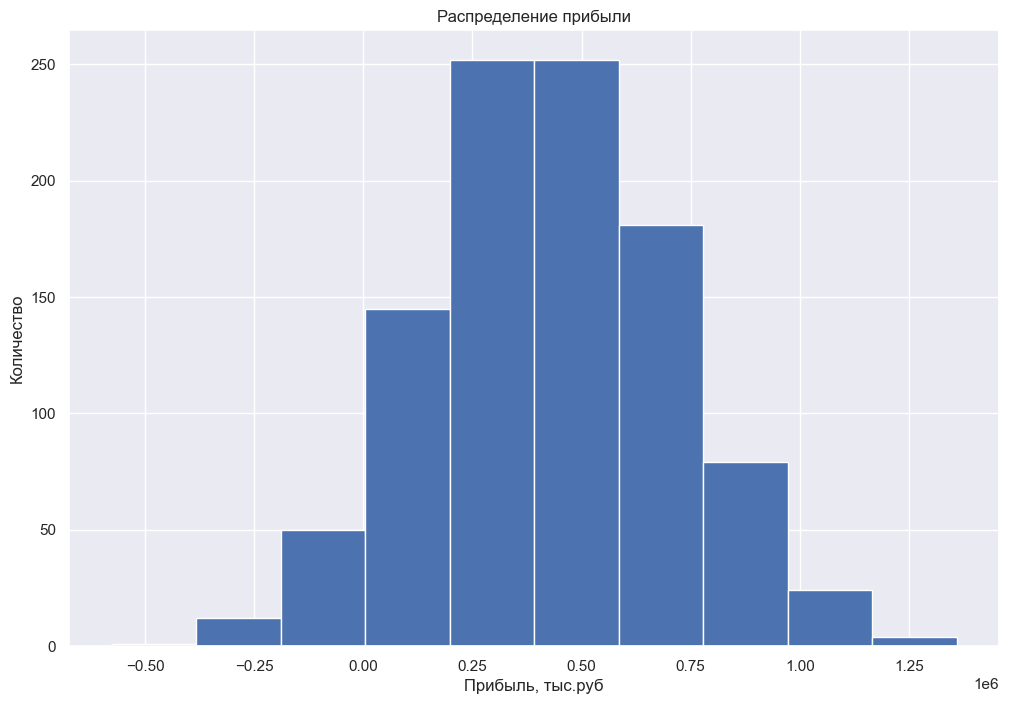

In [68]:
values_0.plot(kind="hist", grid=True, figsize=(12,8))
plt.title('Распределение прибыли')
plt.xlabel('Прибыль, тыс.руб')
plt.ylabel('Количество')
plt.show()

In [69]:
print('Средняя прибыль:',round((values_0.mean()),5), 'тыс.руб')
print('0.25 квантиль:',values_0.quantile(0.025))
print('0.975 квантиль:',values_0.quantile(0.975))
print('95%-ый доверительный интервал: от',(interval_0[0]).round(5), 'тыс.руб до',(interval_0[1].round(5)),'тыс.руб')
print('Вероятность убытка (%):',((values_0 < 0).sum()/len(values_0))*100)

Средняя прибыль: 427355.56719 тыс.руб
0.25 квантиль: -102314.5129812944
0.975 квантиль: 980489.1151293296
95%-ый доверительный интервал: от 410086.50636 тыс.руб до 444624.62802 тыс.руб
Вероятность убытка (%): 6.0


**Для 2-го региона**

In [70]:
state = np.random.RandomState(12345)
values_1 = []
for i in range(1000):
    target_subsample = target_valid_1.sample(n=500, replace=True, random_state=state)
    predict_subsample = pd.Series(predict_1, index=target_valid_1.index)[target_subsample.index]
    values_1.append(revenue(predict_subsample, target_subsample, 200))

In [71]:
values_1 = pd.Series(values_1)

In [72]:
interval_1 = st.t.interval(confidence=0.95, df=len(values_1)-1, loc=np.mean(values_1), scale=st.sem(values_1))

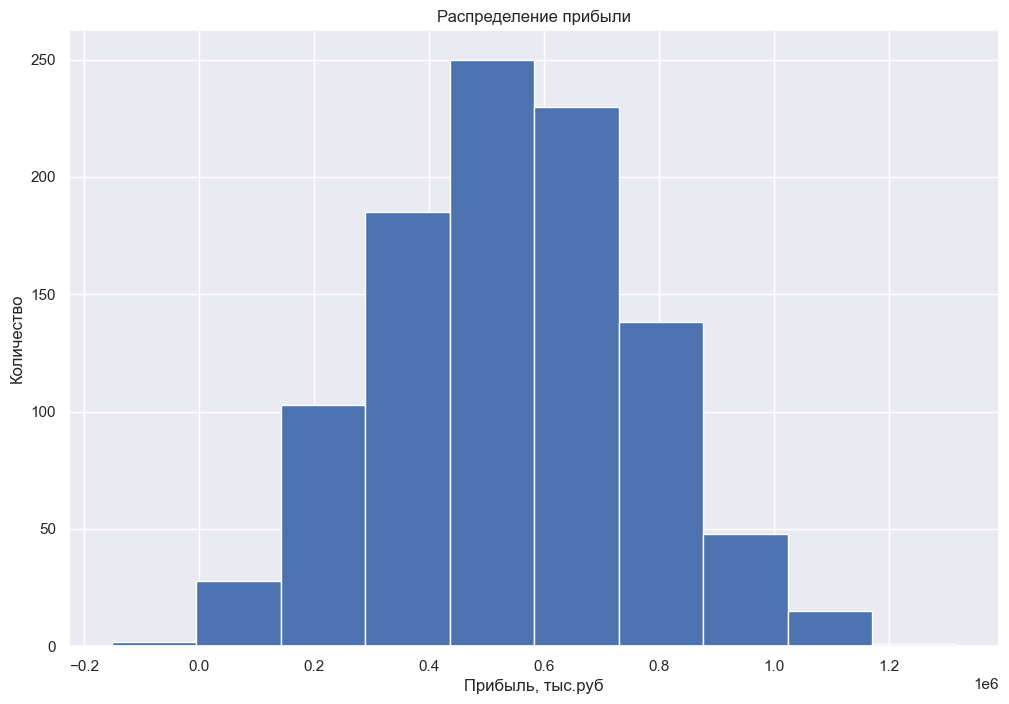

In [73]:
values_1.plot(kind="hist", grid=True, figsize=(12,8))
plt.title('Распределение прибыли')
plt.xlabel('Прибыль, тыс.руб')
plt.ylabel('Количество')
plt.show()

In [74]:
print('Средняя прибыль:',round((values_1.mean()),5), 'тыс.руб')
print('0.25 квантиль:',values_1.quantile(0.025))
print('0.975 квантиль:',values_1.quantile(0.975))
print('95%-ый доверительный интервал: от',(interval_1[0]).round(5), 'тыс.руб до',(interval_1[1].round(5)),'тыс.руб')
print('Вероятность убытка (%):',((values_1 < 0).sum()/len(values_1))*100)

Средняя прибыль: 544535.62661 тыс.руб
0.25 квантиль: 134494.04934344278
0.975 квантиль: 997819.9584822335
95%-ый доверительный интервал: от 530880.19754 тыс.руб до 558191.05568 тыс.руб
Вероятность убытка (%): 0.2


**Для 3-го региона**

In [75]:
state = np.random.RandomState(12345)
values_2 = []
for i in range(1000):
    target_subsample = target_valid_2.sample(n=500, replace=True, random_state=state)
    predict_subsample = pd.Series(predict_2, index=target_valid_2.index)[target_subsample.index]
    values_2.append(revenue(predict_subsample, target_subsample, 200))

In [76]:
values_2 = pd.Series(values_2)

In [77]:
interval_2 = st.t.interval(confidence=0.95, df=len(values_2)-1, loc=np.mean(values_2), scale=st.sem(values_2))

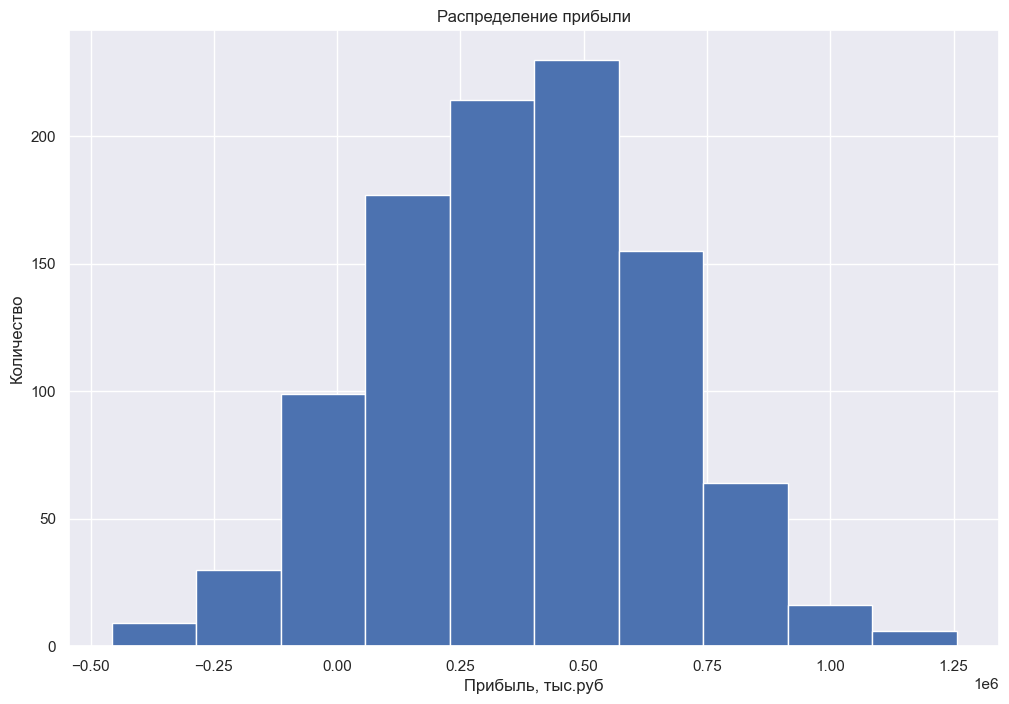

In [78]:
values_2.plot(kind="hist", grid=True, figsize=(12,8))
plt.title('Распределение прибыли')
plt.xlabel('Прибыль, тыс.руб')
plt.ylabel('Количество')
plt.show()

In [79]:
print('Средняя прибыль:',round((values_2.mean()),5), 'тыс.руб')
print('0.25 квантиль:',values_2.quantile(0.025))
print('0.975 квантиль:',values_2.quantile(0.975))
print('95%-ый доверительный интервал: от',(interval_2[0]).round(5), 'тыс.руб до',(interval_2[1].round(5)),'тыс.руб')
print('Вероятность убытка (%):',((values_2 < 0).sum()/len(values_2))*100)

Средняя прибыль: 368644.19906 тыс.руб
0.25 квантиль: -175033.29721882605
0.975 квантиль: 890842.9402342946
95%-ый доверительный интервал: от 351311.66869 тыс.руб до 385976.72944 тыс.руб
Вероятность убытка (%): 9.0


In [80]:
def new_revenue(predict, target, count):
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state = state)
        predict_subsample = pd.Series(predict, index=target.index)[target_subsample.index]
        values.append(revenue(predict_subsample, target_subsample, 200))
    values = pd.Series(values)
    inter = st.t.interval(confidence=0.95, df=len(values)-1, loc=np.mean(values), scale=st.sem(values))
    
    values.plot(kind="hist", grid=True, figsize=(12,8))
    plt.title('Распределение прибыли')
    plt.xlabel('Прибыль, тыс.руб')
    plt.ylabel('Количество')
    plt.show()
    
    print('Средняя прибыль:',round((values.mean()),5), 'тыс.руб')
    print('95%-ый доверительный интервал: от',(inter[0]).round(5), 'тыс.руб до',(inter[1].round(5)),'тыс.руб')
    print('Вероятность убытка (%):',((values < 0).sum()/len(values))*100)

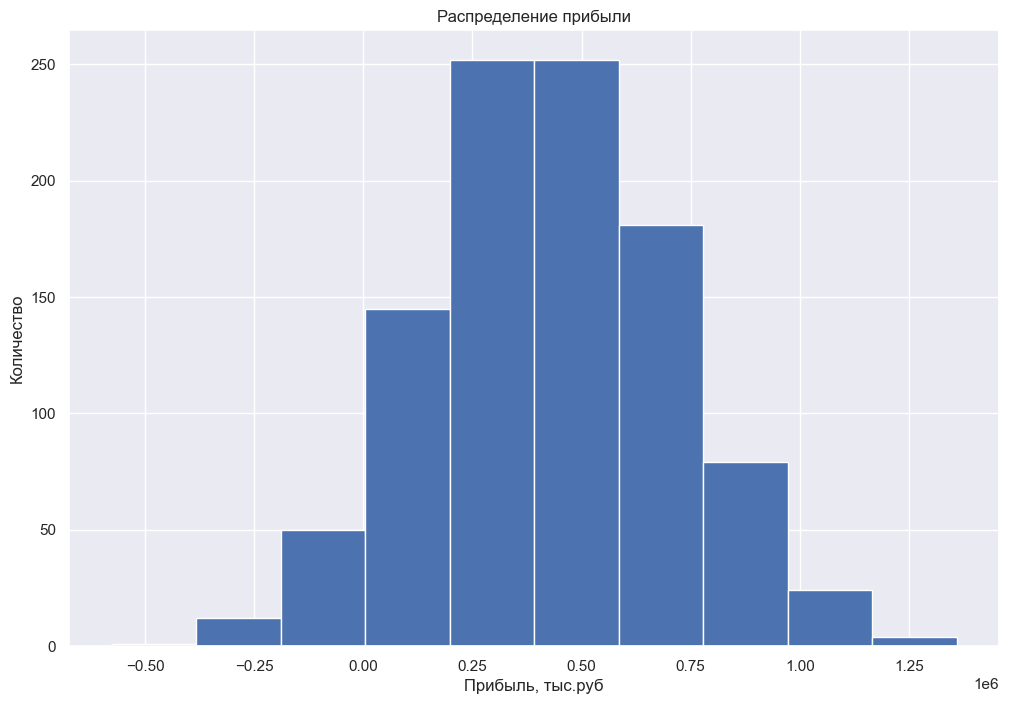

Средняя прибыль: 427355.56719 тыс.руб
95%-ый доверительный интервал: от 410086.50636 тыс.руб до 444624.62802 тыс.руб
Вероятность убытка (%): 6.0


In [81]:
new_revenue(predict_0, target_valid_0, 200)

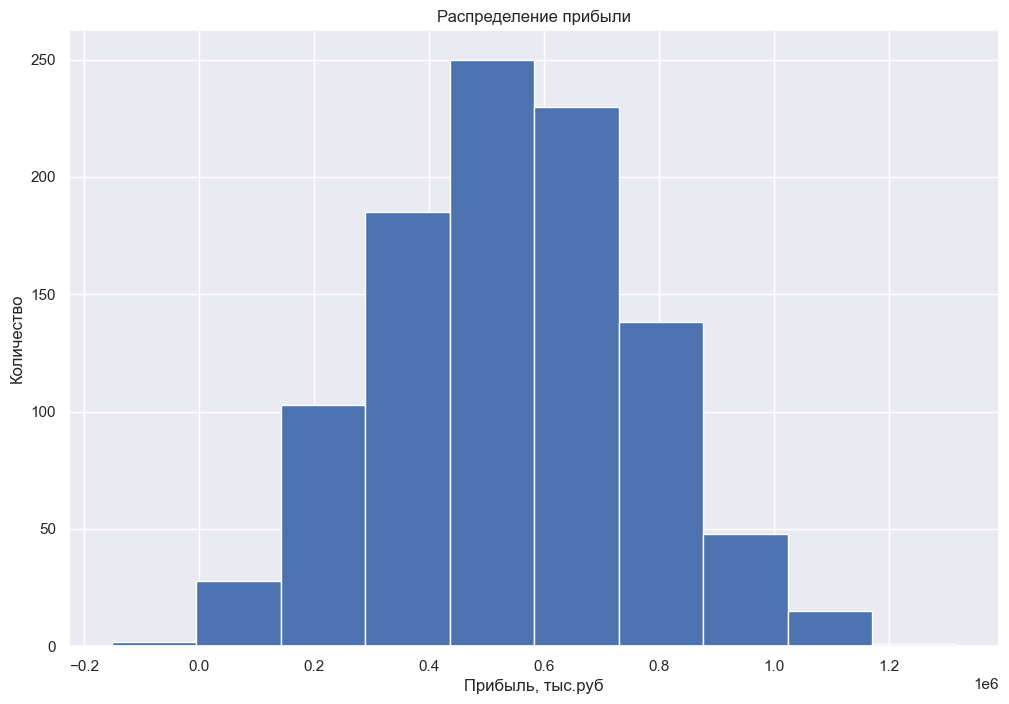

Средняя прибыль: 544535.62661 тыс.руб
95%-ый доверительный интервал: от 530880.19754 тыс.руб до 558191.05568 тыс.руб
Вероятность убытка (%): 0.2


In [82]:
new_revenue(predict_1, target_valid_1, 200)

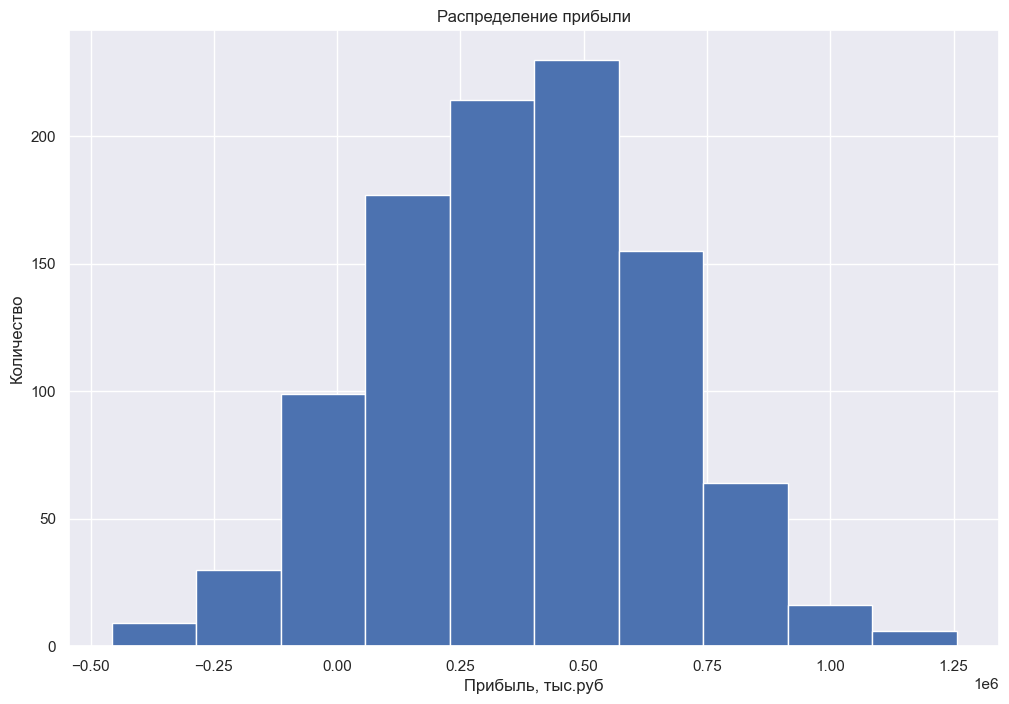

Средняя прибыль: 368644.19906 тыс.руб
95%-ый доверительный интервал: от 351311.66869 тыс.руб до 385976.72944 тыс.руб
Вероятность убытка (%): 9.0


In [83]:
new_revenue(predict_2, target_valid_2, 200)

**Вывод:** Исходя из построенных гистограмм и полученных данных вероятность окупаемости и получения наибольшей прибыли при разработке 200 скажин во  2-ом регионе.

## Вывод

При первичном ознакомлении с данными геологической разведки в 3-х регионах было обнаружено, что средний запас сырья недостаточен для окупаемости вложений после их разработки. Но это на первый взгляд. Оценив возможноть реализации денежных средст, принято решение о рассмотрении 200-а наиболее перспективных скважин в каждом регионе.

В результате исследования выявлено, что наиболее перспективным местом разработки является 2-ой регион.

По сравнению с остальными регионами вероятноть убытка составляет менее 2.5%, а средняя прибыль - 541 млн. руб, которая также выше чем у 1-го и 3-го регионов.